In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, chi2, mutual_info_classif

In [41]:
df = pd.read_csv('data/collision_dataset.csv')
df['label'] = df['label'].map(lambda label: 0 if label == 'neg' else 1)
df.iloc[:, 4:] = df.iloc[:, 4:].apply(pd.to_numeric)
df = df.dropna()
df = df.drop_duplicates() 
df.head()

,label,driver_id,event_dt,industry,trigger_type_12_cnt,trigger_type_22_cnt,trigger_sub_type_1015_cnt,trigger_sub_type_1016_cnt,trigger_sub_type_1018_cnt,trigger_sub_type_39_cnt,...,behavior_87_cnt,behavior_88_cnt,behavior_89_cnt,behavior_90_cnt,behavior_116_cnt,behavior_119_cnt,behavior_120_cnt,behavior_121_cnt,behavior_122_cnt,behavior_123_cnt
0,1,0000FFFF-0000-0200-E0C8-628E40EE0000,7/13/2017,industry_5,0,0,0,0,0,1,...,0,0,1,0,0,0,0,0,0,0
1,0,0000FFFF-0000-0400-DC1A-628E40EE0000,8/18/2017,industry_0,0,0,0,0,0,1,...,1,0,0,0,0,0,0,0,0,0
2,0,0000FFFF-0000-0500-8242-628E40EE0000,12/1/2017,industry_3,0,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0
3,0,7868242D-CB7B-E411-B9DB-02215E5EED57,10/16/2017,industry_2,0,0,0,0,0,0,...,1,0,1,0,0,0,0,0,0,0
4,0,0000FFFF-0000-0200-1A79-628E40EE0000,6/6/2017,industry_3,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


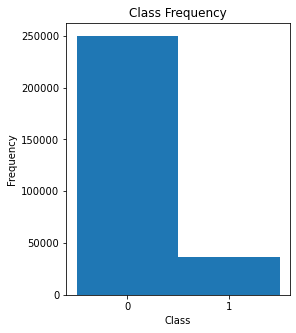

In [42]:
unique, counts = np.unique(df['label'], return_counts=True)
plt.figure(figsize=(4,5))
plt.bar(unique, counts, 1)
plt.title('Class Frequency')
plt.xlabel('Class')
plt.xticks([0, 1])
plt.ylabel('Frequency')
plt.show()

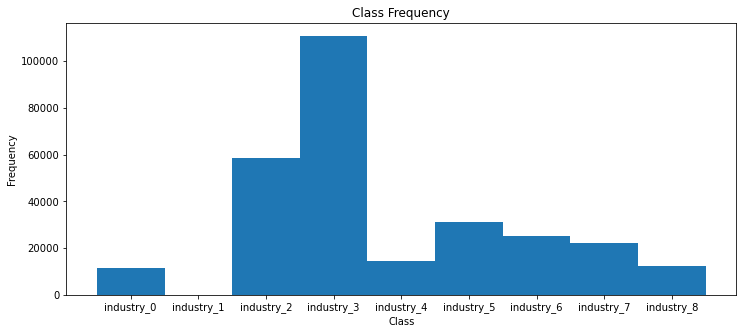

In [43]:
unique, counts = np.unique(df['industry'], return_counts=True)
plt.figure(figsize=(12,5))
plt.bar(unique, counts, 1)
plt.title('Class Frequency')
plt.xlabel('Class')
plt.ylabel('Frequency')
plt.show()

In [44]:
df = df[df['industry'] != 'industry_1']

In [92]:
industry = np.array(pd.get_dummies(df['industry'], drop_first=True))
rest = df.iloc[:, 4:]
y = df['label']

In [93]:
rest_reduced = SelectKBest(score_func=chi2, k=33).fit_transform(rest, y)

In [105]:
pd.DataFrame(np.hstack((rest_reduced, np.array(y).reshape(-1,1)))).corr()

,0,1,2,3,4,5,6,7,8,9,...,24,25,26,27,28,29,30,31,32,33
0,1.000000,0.568175,0.020785,0.012841,0.225643,0.037921,-0.028185,0.001323,0.091888,-0.008279,...,-0.008239,-0.018245,0.159155,0.090792,-0.045710,-0.040660,-0.034117,-0.056865,-0.000222,-0.018974
1,0.568175,1.000000,0.040879,0.038248,0.175787,0.028751,-0.014071,0.006295,0.075999,-0.009115,...,0.002091,-0.010267,0.155022,0.074145,-0.041034,0.006464,-0.023335,-0.005843,0.017413,-0.026476
2,0.020785,0.040879,1.000000,0.338650,0.165798,0.001945,0.159148,0.125801,0.185097,0.052375,...,0.168766,0.128399,0.136436,0.101869,0.103654,0.121594,0.105134,0.209017,0.134985,-0.064822
3,0.012841,0.038248,0.338650,1.000000,0.171665,0.006005,0.181050,0.145730,0.272658,0.064548,...,0.198611,0.190057,0.182067,0.131729,0.100317,0.110619,0.112911,0.287597,0.173805,-0.028932
4,0.225643,0.175787,0.165798,0.171665,1.000000,0.012109,0.076132,0.075471,0.144777,0.038215,...,0.109514,0.081002,0.138267,0.137872,0.054928,0.079863,0.066707,0.113127,0.073530,-0.024107
5,0.037921,0.028751,0.001945,0.006005,0.012109,1.000000,-0.001563,0.002920,0.010268,-0.001097,...,0.002812,-0.000577,0.014100,0.011726,-0.003183,0.000181,-0.000930,-0.000514,0.001366,0.021589
6,-0.028185,-0.014071,0.159148,0.181050,0.076132,-0.001563,1.000000,0.199305,0.191281,0.068585,...,0.204984,0.177633,0.191001,0.109238,0.167176,0.046946,0.152464,0.174387,0.126088,0.043672
7,0.001323,0.006295,0.125801,0.145730,0.075471,0.002920,0.199305,1.000000,0.186786,0.062642,...,0.156942,0.141463,0.153141,0.117699,0.114097,0.056490,0.121254,0.155342,0.098732,0.047801
8,0.091888,0.075999,0.185097,0.272658,0.144777,0.010268,0.191281,0.186786,1.000000,0.085274,...,0.181047,0.187586,0.224365,0.185813,0.104723,0.057037,0.113610,0.182246,0.111532,0.054278
9,-0.008279,-0.009115,0.052375,0.064548,0.038215,-0.001097,0.068585,0.062642,0.085274,1.000000,...,0.070288,0.068229,0.037449,0.079117,0.069314,0.022526,0.068631,0.045513,0.031247,0.041607


In [94]:
X = np.hstack((industry, rest_reduced))

In [95]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [96]:
# X_train
with open('Pickles/X_train.pickle', 'wb') as output:
    pickle.dump(X_train, output)
    
# X_test    
with open('Pickles/X_test.pickle', 'wb') as output:
    pickle.dump(X_test, output)
    
# y_train
with open('Pickles/y_train.pickle', 'wb') as output:
    pickle.dump(y_train, output)
    
# y_test
with open('Pickles/y_test.pickle', 'wb') as output:
    pickle.dump(y_test, output)